# Method1 Huffman encoding

## Import Libraries & Load Data

In [1]:
import numpy as np
from scipy.fft import fft,fftshift
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from scipy import signal
from scipy.fftpack import fft, dct, idct
from itertools import islice 
import os
import pandas as pd

In [2]:
temp = pd.read_csv('TEMP.csv')
#temp = temp.iloc[1:]
np.savetxt('temp.txt',temp)


sampling_freq = 1/4  #This is the sampling frequency
N = temp.size  #The number of point

temp_array = temp.to_numpy() #save the data into an ndarray
temp_array.size

xf = np.linspace(-N*sampling_freq/2, N*sampling_freq/2,  N)

index = np.linspace(0, round((N-1)*sampling_freq,4), N)

temp_array_new = []
for i in temp_array:
    temp_array_new.append(list(i)[0])

TEMP data doesn't have to be filtered and resampled because of it's low sampling frequency

In [3]:
resampled_signal = temp_array_new  #This squared number need to be decided by the users
np.savetxt('processed_temp.txt',resampled_signal)
rounded_signal = np.around(resampled_signal, 3)

## Transformation

In [4]:
aN = dct(rounded_signal, type = 2, norm = 'ortho')

In [5]:
def return_N(target):
    if target > 1:
        for i in range(1, int(target)):
            if (2 ** i >= target):
                return i-1
    else:
        return 1

In [6]:
split_list = [1]
for i in range(0,return_N(aN.size)):
    split_list.append(2 ** i)
temp = iter(aN) 
res = [list(islice(temp, 0, ele)) for ele in split_list] 

In [7]:
cN_idct = [list(idct(res[0], type = 2, norm = 'ortho' )), list(idct(res[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res)):
    cN_idct.append(list(idct(res[k], type = 2, norm = 'ortho' )))

In [8]:
all_numbers = []
for i in cN_idct:
    for j in i:
        all_numbers.append(j)
all_numbers = np.asarray(all_numbers)
new_cN_idct = all_numbers
int_cN = np.round(new_cN_idct, 3)
np.savetxt('int_cN.txt',int_cN,fmt='%.3f')

## Huffman Coding

### INSTRUCTION ON HOW TO COMPRESS THE DATA BY HUFFMAN CODING


(I used the package "tcmpr 0.2" and "pyhuff 1.1". These two packages provided the same compression result. So here, we just use "tcmpr 0.2")

1. Open your termial or git bash, enter "pip install tcmpr" to install the "tcmpr 0.2" package
2. Enter the directory which include the file you want to compress OR copy the path of the file you want to compress
3. Enter "tcmpr filename.txt" / "tcmpr filepath" to compress the file
4. Find the compressed file in the same directory of the original file

In [9]:
# Do Huffman encoding based on the instruction above 
# or run this trunk if this scratch locates in the same directory with the signal you want to encode
os.system('tcmpr int_cN.txt')

0

## Reconstruction

In [10]:
os.system('tcmpr -d int_cN.txt.huffman')
decoded_data = np.loadtxt(fname = "int_cN.txt")

In [11]:
recover_signal = decoded_data 
recover_signal = list(recover_signal)
split_list = [1]
for i in range(0,return_N(len(recover_signal))+1):
    split_list.append(2 ** i)
temp_recovered = iter(recover_signal) 
res_recovered = [list(islice(temp_recovered, 0, ele)) for ele in split_list] 

In [12]:
recover_dct = [list(dct(res_recovered[0], type = 2, norm = 'ortho' )), list(dct(res_recovered[1], type = 2, norm = 'ortho' ))]
for k in range(2,len(res_recovered)):
    recover_dct.append(list(dct(res_recovered[k], type = 2, norm = 'ortho' )))

In [13]:
all_recover = []
for i in recover_dct:
    for j in i:
        all_recover.append(j)
aN_recover = idct(all_recover, type = 2, norm = 'ortho')

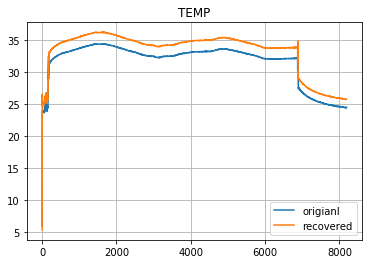

In [14]:
plt.plot(signal.resample(temp_array_new, len(aN_recover)),label = "origianl" )
plt.plot(aN_recover, label = "recovered")
plt.legend()
plt.title('TEMP')
plt.grid()
plt.show()

In [15]:
resampled_signal_shorter = signal.resample(temp_array_new, len(aN_recover))
#resampled_signal_shorter = resampled_signal[:len(aN_recover)] 
from sklearn.metrics import mean_squared_error
from math import sqrt

def PRD_calculation(original_signal, compressed_signal):
    PRD = sqrt(sum((original_signal-compressed_signal)**2)/(sum(original_signal**2)))
    return PRD

PRD = PRD_calculation(resampled_signal_shorter, aN_recover)
print("The PRD is {}%".format(PRD*100))

The PRD is 5.287003146935816%
